# Lab 7

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import pickle

plt.rcParams["figure.figsize"] = (15,10)


In [2]:
with open('/home/jovyan/LHC_Data/Training-Set-2/higgs_100000_pt_1000_1200.pkl', 'rb') as f:
    higgs = pickle.load(f)
with open('/home/jovyan/LHC_Data/Training-Set-2/qcd_100000_pt_1000_1200.pkl', 'rb') as f:
    qcd = pickle.load(f)

# 1. Make a stacked histogram plot for the feature variable: mass

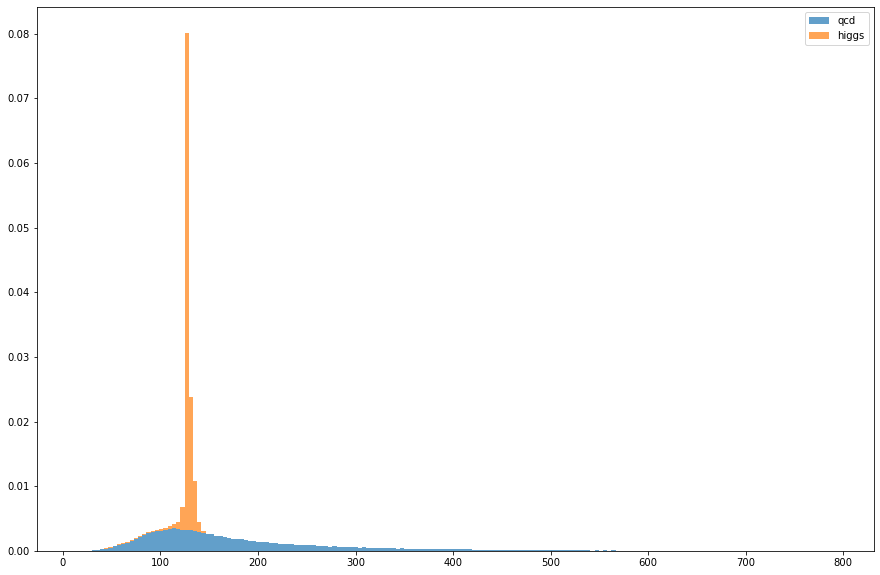

In [3]:
plt.hist([qcd['mass'],higgs['mass']],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7);
plt.legend();

## Evaluate expected significance without any event selection.
### Use Poisson statistics for significance calculation:

In [4]:
n_qcd = 2000
n_higgs = 50
prob = stats.poisson.sf(n_qcd+n_higgs,mu=n_qcd)

In [5]:
prob

0.12961287455491954

In [6]:
f'this is a sigma value of {stats.norm.ppf(1-prob):.3f}'

'this is a sigma value of 1.128'

Compare the exact significance to the approximation  $N_{Higgs}/(√N_{QCD})$ . If they are equivalent, explain your findings.

In [7]:
n_higgs/np.sqrt(n_qcd)

1.118033988749895

These are near equivalent

# 2. Identify mass cuts to optimize the expected significance.
* Try different mass cuts systematically
* Evaluate expected significance for each set of mass cuts
* Identify the set of mass cuts which give you the highest significance.

In [8]:
np.median(higgs['mass'])

126.83836959704834

Because the qcd histogram extends left and right of the higgs histogram, I will try cuts to the left and right of certain values. The following are a number of cuts I tried in a search for the best significance I could find:

In [9]:
def make_cuts(cut,data = higgs):
    tot_qcd = 0
    tot_higgs = 0
    for i in range(len(higgs)):

        if cut[0] <= qcd['mass'][i] <= cut[1]:
            tot_qcd += 1

        if cut[0] <= higgs['mass'][i] <= cut[1]:
            tot_higgs += 1

    
    count_qcd = tot_qcd * n_qcd/len(qcd)
    count_higgs = tot_higgs * n_higgs/len(higgs) 
    
    prob = stats.poisson.sf(count_qcd+count_higgs,mu=count_qcd)
    sigma = stats.norm.ppf(1-prob)
    
    return count_qcd,count_higgs, sigma

In [10]:
#cuts in [min,max] mass values
cuts = [[120,140],[124,132],[124,130],[125,128],[125,129],[125,130]]

cut_data = []
for cut in cuts:
    data = make_cuts(cut)
    cut_data.append(data)

In [11]:
for i in range(len(cuts)):
    print(f'for cutting between {cuts[i][0]} and {cuts[i][1]} we have a significance of {cut_data[i][2]}')

for cutting between 120 and 140 we have a significance of 2.906548157224342
for cutting between 124 and 132 we have a significance of 3.8533187375186038
for cutting between 124 and 130 we have a significance of 3.993622369521206
for cutting between 125 and 128 we have a significance of 3.990881171379639
for cutting between 125 and 129 we have a significance of 4.020574470625383
for cutting between 125 and 130 we have a significance of 3.971424931588165


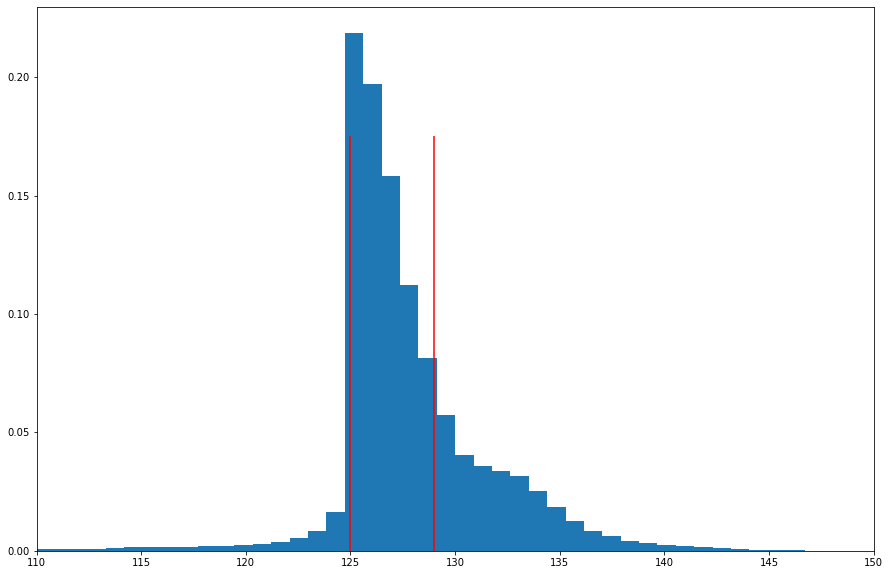

In [12]:
plt.hist(higgs['mass'],bins=150,density=True)
plt.xlim(110,150)
plt.vlines([125,129],0,0.175,colors='r');

# 2. make two sets of stacked histogram plots for the rest of the features

* Set A without any event selection
* Set B with your optimal mass cuts


In [13]:
qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


In [14]:
qcd.keys

<bound method NDFrame.keys of                 pt       eta       phi        mass       ee2       ee3  \
0      1034.181543  1.193191  2.942234  272.010881  0.102485  0.003492   
1      1125.535509 -1.833090  0.121390  139.794408  0.035430  0.000288   
2      1099.223087  0.557867 -1.238027  245.413146  0.099080  0.002563   
3      1118.230032  1.505473  1.953123   89.975916  0.017950  0.000077   
4      1059.907996 -0.387179 -1.064832   85.893956  0.018515  0.000072   
...            ...       ...       ...         ...       ...       ...   
99995  1185.924965 -1.282700 -2.203558  178.917178  0.051779  0.000606   
99996  1070.385446 -0.762397 -2.405166  143.872351  0.032136  0.000224   
99997  1116.722590 -0.166511 -1.141038  118.185074  0.049617  0.000331   
99998  1147.609045  0.405501 -1.125710  292.925318  0.129771  0.004310   
99999  1137.912157  0.549714 -1.934638  135.473349  0.020866  0.000163   

              d2  angularity        t1        t2        t3       t21  \
0       3

In [16]:
higgs_cut = higgs.query('125<mass<129')    
higgs_cut = higgs_cut.reindex(range(len(higgs_cut)))

qcd_cut = qcd.query('125<mass<129')
qcd_cut = qcd_cut.reindex(range(len(qcd_cut)))


In [17]:
plt.rcParams["figure.figsize"] = (20,10)

def get_indices():
    higgs_cuts = np.where(higgs['mass'] > cut[0] & higgs['mass'] > cut[1])


def plot_features():
    
    fig, ax = plt.subplots(1, 2)
    
    
    
    ax[0].hist([qcd[feature],higgs[feature]],stacked=True,bins=180,density = True, label = ['qcd','higgs'],alpha=0.7);
    ax[0].legend();
    

NameError: name 'feature' is not defined

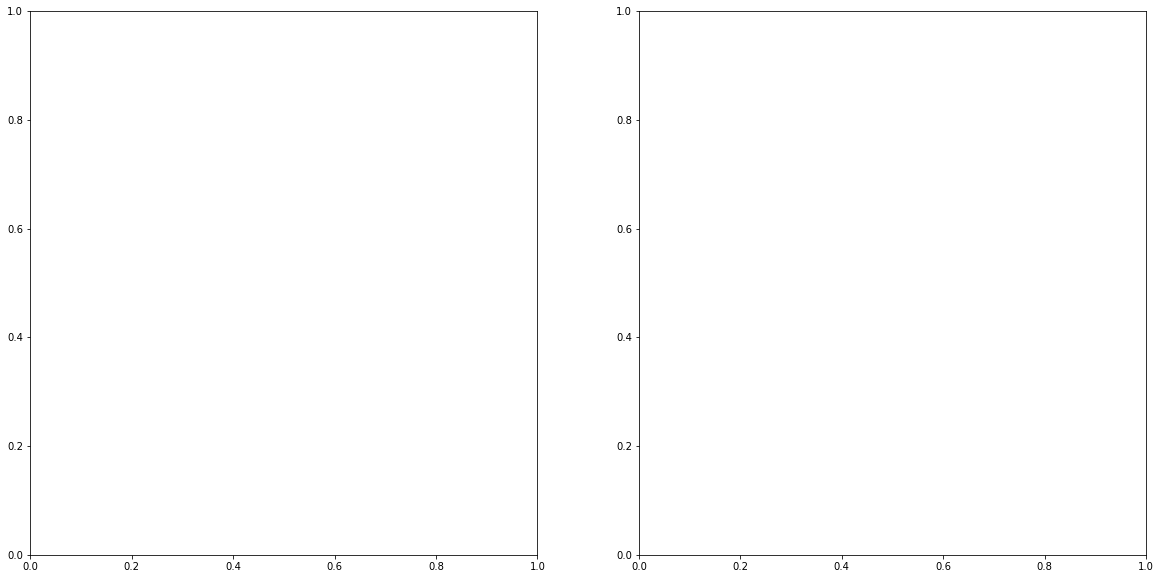

In [18]:
plot_features()

In [19]:
def get_indices(cut):
    higgs_cuts = np.where((higgs['mass'] > cut[0]) & (higgs['mass'] > cut[1]),)
    return higgs_cuts

In [20]:
get_indices([124,125])

(array([    0,     1,     2, ..., 99996, 99997, 99998]),)

In [21]:
if np.nan > 0:
    print('yes')

In [35]:
tot_qcd = 0
for i in range(len(higgs)):
    if 125 <= float(qcd['mass'][i]) <= 129:
            tot_qcd += 1

In [30]:
tot_qcd

2526

In [37]:
qcd_cut = qcd.query('125<mass<129')
qcd_cut = qcd_cut.reindex(range(len(qcd_cut)))
qcd_cut['mass']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2521   NaN
2522   NaN
2523   NaN
2524   NaN
2525   NaN
Name: mass, Length: 2526, dtype: float64

In [32]:
tot_qcd = 0
for i in range(len(qcd_cut)):
    if 125 <= qcd_cut['mass'][i] <= 129:
            tot_qcd += 1

In [33]:
tot_qcd

69